In [48]:
import os
os.chdir('/Users/maksym.konevych/Documents/Projects/HWPersonalization/Categorization/Code/ai_categories_experiment')

In [49]:
from pathlib import Path

import pandas as pd

In [50]:
p_books_with_predictions = Path('data/v0.1.0.books_predictions.csv')

In [51]:
df_books = pd.read_csv(p_books_with_predictions)
for col in ['categories', 'pred_reasoning_steps', 'pred_categories']:
    df_books[col] = df_books[col].apply(lambda s: [] if pd.isna(s) else s.split('|'))

In [52]:
len(df_books)

1816

In [53]:
df_books.head()

,Unnamed: 0,firebase_document_path,id,title,author,overview,author_overview,categories,pred_reasoning_steps,pred_categories
0,0,books/0059543c-a8e5-4615-a78c-69f8e73c19c1,0059543c-a8e5-4615-a78c-69f8e73c19c1,Parenting the New Teen in the Age of Anxiety: ...,John Duffy,You're looking at a modern parenting guide. Te...,John Duffy is a successful clinical psychologi...,[Family],"[The book is a parenting guide, which suggests...","[Family, Health, Society & Tech]"
1,1,books/00bb4531-5150-44af-9eb1-c160c7d26ed6,00bb4531-5150-44af-9eb1-c160c7d26ed6,"Right Thing, Right Now: Good Values, Good Char...",Ryan Holiday,The modern world has many fascinating inventio...,Ryan Holiday is known for bringing philosophy ...,[Self-Growth],[The book discusses the importance of moral co...,"[Happiness, Spirituality, Self-Growth]"
2,2,books/012399fc36f74c489e4e,012399fc36f74c489e4e,Eat Move Sleep: How Small Choices Lead to Big ...,Tom Rath,"Discover how inner strength, willpower, and ri...",Tom Rath is a renowned author of best-selling ...,[Health],[The book focuses on well-being and making cho...,"[Health, Self-Growth]"
3,3,books/012d6fde-51e2-4289-822a-1cbb57394bcd,012d6fde-51e2-4289-822a-1cbb57394bcd,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,"Achieving your dreams is fulfilling, but what ...",Arthur C. Brooks is a scientist whose research...,"[Happiness, Self-Growth]","[The book's title, 'From Strength to Strength'...","[Happiness, Self-Growth]"
4,4,books/017dab0f35d34af59653,017dab0f35d34af59653,"Dream Big: Know What You Want, Why You Want It...",Bob Goff,Break free from the cycle of unfinished projec...,"Robert Kendall Goff is a speaker, lawyer, auth...",[Self-Growth],[The title 'Dream Big' suggests a focus on asp...,"[Self-Growth, Productivity]"


In [54]:
# Flatten the lists in each column and get unique values
unique_categories = set(cat for sublist in df_books['categories'] for cat in sublist)
unique_pred_categories = set(cat for sublist in df_books['pred_categories'] for cat in sublist)

# Print the counts
print(f"Number of unique categories: {len(unique_categories)}")
print(f"Number of unique predicted categories: {len(unique_pred_categories)}")
print(f"Same categories: {len(set(unique_categories) & set(unique_pred_categories))}")

Number of unique categories: 16
Number of unique predicted categories: 16
Same categories: 16


In [55]:
def show_books(df: pd.DataFrame) -> None:
    for i, row in df.iterrows():
        print(f'Book (idx={i})')
        print(f' - Title: "{row["title"]}"')
        print(f' - Author: {row["author"]}')
        newline = "\n"
        print(f' - Overview: {row["overview"].replace(newline, " ") if not pd.isna(row["overview"]) else None}')
        print(f' - Author Overview: {row["author_overview"].replace(newline, " ") if not pd.isna(row["overview"]) else None}')
        print(f' - Categories: {row["categories"]}')
        print(f' - AI Categories: {row["pred_categories"]}')
        print(f' - AI Reasoning Steps: {row["pred_reasoning_steps"]}')
        print()
        print()

In [56]:
show_books(df_books.sample(10, random_state=42))

Book (idx=1506)
 - Title: "This Is Me Letting You Go"
 - Author: Heidi Priebe
 - Overview: Explore simple yet profound insights for moving on after heartbreak and embracing life with renewed strength. It is a must-read for anyone seeking emotional recovery and growth.
 - Author Overview: Heidi Priebe is a self-help author known for her relatable and insightful writing on relationships, self-love, and personal growth.
 - Categories: ['Self-Growth', 'Love & Sex']
 - AI Categories: ['Self-Growth']
 - AI Reasoning Steps: ["The title 'This Is Me Letting You Go' suggests themes of letting go and moving on, which aligns closely with emotional recovery and personal growth.", 'The author, Heidi Priebe, is known for writing about emotional and psychological topics, which further supports the idea that this book focuses on self-growth and healing after heartbreak.', "The overview emphasizes 'moving on after heartbreak' and 'embracing life with renewed strength', indicating a strong focus on perso

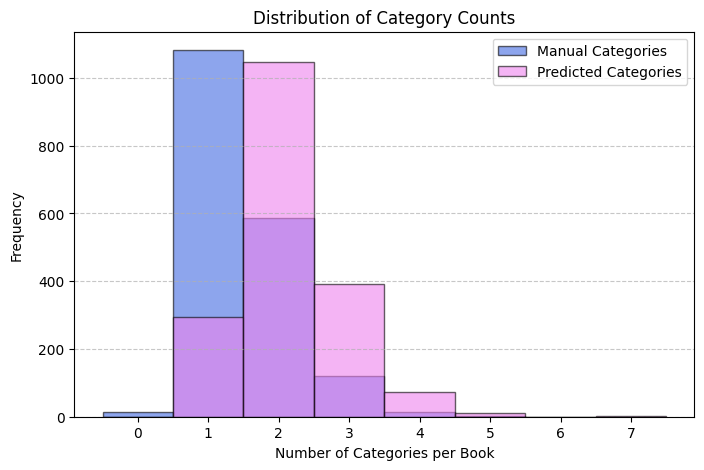

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_category_count_distribution(df, col1, col2, title='Distribution of Category Counts'):
    """
    Plots the distribution of the number of categories per book for both manual and predicted categories.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :param title: Title of the plot
    """
    # Compute number of categories per book
    manual_counts = df[col1].apply(len)
    predicted_counts = df[col2].apply(len)

    # Set bins based on max count
    max_count = max(manual_counts.max(), predicted_counts.max())
    bins = np.arange(0, max_count + 1.5) - 0.5  # Ensure integer bin edges

    # Plot histograms
    plt.figure(figsize=(8, 5))
    plt.hist(manual_counts, bins=bins, alpha=0.6, color='royalblue', edgecolor='black', label='Manual Categories')
    plt.hist(predicted_counts, bins=bins, alpha=0.6, color='violet', edgecolor='black', label='Predicted Categories')

    # Labels and formatting
    plt.xlabel('Number of Categories per Book')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(0, max_count + 1))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Usage
plot_category_count_distribution(df_books, 'categories', 'pred_categories')


 - The most common number of manual categories — 1
 - The number of predicted categories has wider distribution. Mode — 2 ,then 3, and only then 1.

Why? The obvious question is 
 - Does AI has tendency to assign irrelevant categories?

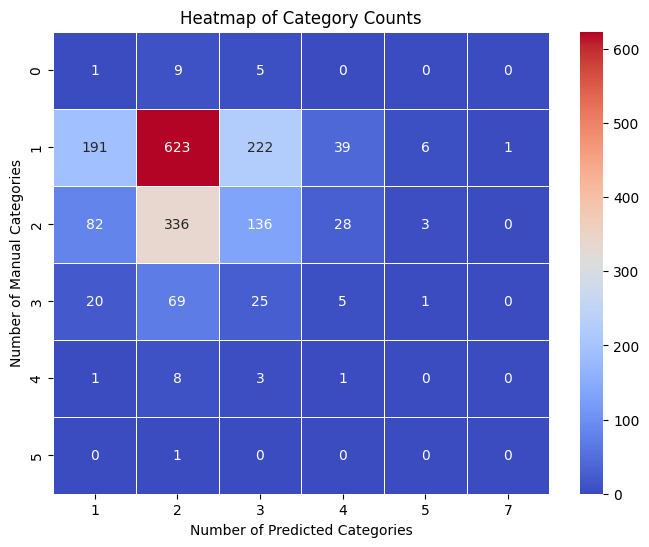

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_category_count_heatmap(df, col1, col2, title='Heatmap of Category Counts'):
    """
    Plots a heatmap showing the relationship between the number of manual and predicted categories per book.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :param title: Title of the plot
    """
    # Compute number of categories per book
    manual_counts = df[col1].apply(len)
    predicted_counts = df[col2].apply(len)

    # Create a dataframe for heatmap
    heatmap_data = pd.crosstab(manual_counts, predicted_counts)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)

    # Labels and formatting
    plt.xlabel('Number of Predicted Categories')
    plt.ylabel('Number of Manual Categories')
    plt.title(title)
    plt.show()

# Usage
plot_category_count_heatmap(df_books, 'categories', 'pred_categories')


In [59]:
# ensure validity of the plot above
len(df_books[(df_books['categories'].apply(len) == 1) & (df_books['pred_categories'].apply(len) == 2)])

623

Here we see the picture in more detail. 
 - The most common case — there is 1 manual category but AI predicts 2; in the similar vein, AI predicting 3 categories is the second most common case. 
 - Although less frequently, the number of categories assign can match (for 1 and 2, mostly).
 - There are some outliers. Noticeably, there are cases when summaries have no manual categories at all, but AI predicts 2-4 categories. There is one case when AI hasn't assigned any category (but there is one manual category). Also, interestingly, there is the case when there are 5 manual categories and only 2 AI categories.

In [60]:
show_books(df_books[(df_books['categories'].apply(len) == 1) & (df_books['pred_categories'].apply(len) == 2)].sample(n=10, random_state=42))

Book (idx=631)
 - Title: "No Excuses: The Power of Self Discipline"
 - Author: Brian Tracy
 - Overview: Self-discipline is the key to success, so start using it every day to open new doors and build a wonderful future.
 - Author Overview: Brian Tracy has written over 70 books on motivation, success, and leadership, including Eat That Frog. He is also the CEO of Brian Tracy International, which focuses on developing companies and individuals.
 - Categories: ['Productivity']
 - AI Categories: ['Self-Growth', 'Productivity']
 - AI Reasoning Steps: ["The title 'No Excuses: The Power of Self Discipline' suggests a focus on personal responsibility and self-improvement, which aligns closely with the theme of self-discipline.", "The author, Brian Tracy, is known for his work in personal development and success strategies, reinforcing the idea that this book is about enhancing one's personal effectiveness.", 'The overview emphasizes self-discipline as a key to success, indicating that the book 

#### So does AI tend to assign irrelevant categories? Or are the manual categoris not complete?

**JUSTIFIED** will mean that AI has assigned a valid category, i.e. manually assigned categories are not complete. \
**NOT JUSTIFIED**, on the other hand, will mean that AI has assigned redundant, irrelevant category. \ 
We'll use other notations to express ambiguity, etc.


 - 1358 — Interestingly, AI reasoning steps underline the fact that Business & Career is not a fitting category, but it's still present in the final categories. **NOT JUSTIFIED**
 - 1588 — Sports & Fitness is definitelly a fitting category. **JUSTIFIED**
 - 62 — Self-Growth definitely has a relevance to this book, especially considering the Overview. At the same time, it seems slightly off, most non-fiction books can be related to Self-Growth. **AMBIGUOUS**
 - 247 — Self-Growth seems relevant here. **JUSTIFIED**
 - 1288 — Productivity doesn't seem relevant, although AI tries to justify it. **NOT JUSTIFIED**
 - 138 — Interestingly, the two AI categories differ from the one manual category. The overview of the book inclines towards Self-Growth category, although it doesn't seem to be a relevant topic. Business & Career (especially Business) fits. Money & Investment is missing. **PARTIALLY JUSTIFIED**
 - 268 — Business & Career fits. **JUSTIFIED**
 - 1669 — The book includes the story of the family, so Famaily seems a valid category here. **JUSTIFIED**
 - 396 — The categories assigned by AI are valid, but the one manual category should have also been included. **JUSTIFIED**
 - 320 — Again, Self-Growth is relevant, but does seem superfluous. **PARTIALLY JUSTIFIED**


#### CONCLUSIONS
 - It seems that detailed specification of every category would be very beneficial. Passing these specification to AI might significantly improve the accuracy. 
 - The assignment of categories by AI that are not present within manually assigned categoires is often justified. I.e., those categories seem to be missing.
 - Self-Growth is a very common topic with non-fiction books, but frequently its presence seems superfluous.
 - Sometimes, AI hallucinates and assignes invalid categories (#1288)
 - AI can be inconsistent. While it's thoughts about #1358 are valid, the presence of Business & Carreer in final list of categories contradicts them. Additional prompt/flow imporvements might be desirable.


##### Deprecated (indexes are off)
 - 1030 - Happiness seems like a relevant category. **JUSTIFIED**
 - 1765 — A more tricky one, BUT there are mentions of money/investing, moreover, Goodreads assigned category "Finance" as the second most relevant. ***PROBABLY* JUSTIFIED**
 - 1540 — The point is that so many non-fiction books can be related to Self-Growth (as reasoning steps, actually, justify it). PROBABLY JUSTIFIED 
 - 509 — The book definitely expands on Sports & Fitness. **JUSTIFIED**
 - 1775 — Tricky one, in Ukrainian. But the category Presonalities is definitely suitable. **JUSTIFIED**
 - 439 — Business & Career seems a totally fitting category. **JUSTIFIED**


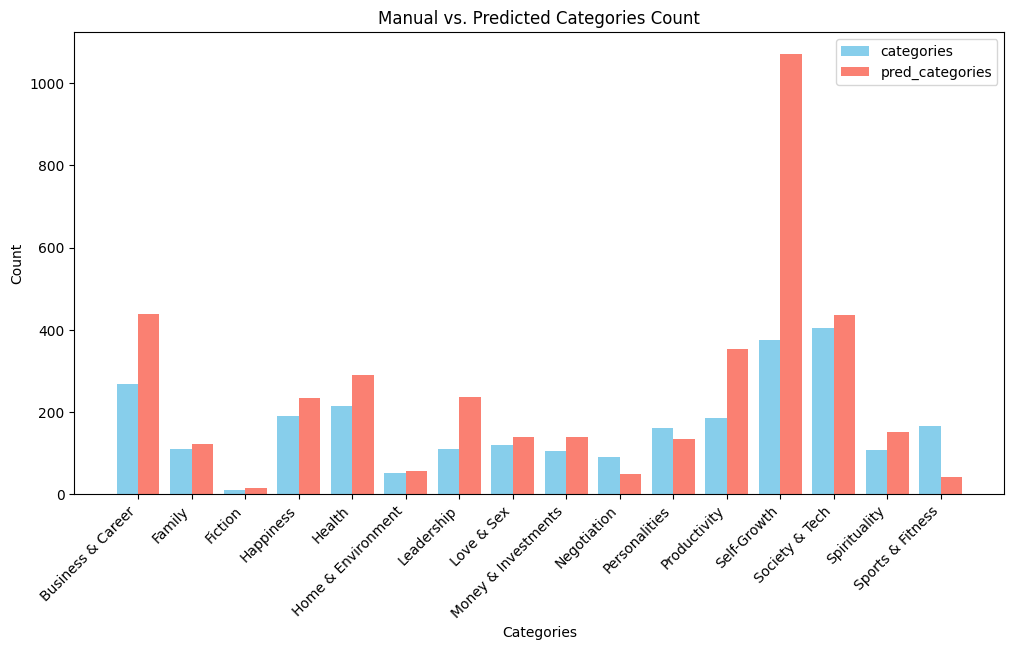

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_category_comparison(df, col1, col2, title):
    """
    Plots the count of each category for two columns in the same bar chart.
    
    :param df: Pandas DataFrame
    :param col1: First column name containing lists of categories
    :param col2: Second column name containing lists of categories
    :param title: Title for the plot
    """
    # Count occurrences in both columns
    counts_col1 = Counter(cat for sublist in df[col1] for cat in sublist)
    counts_col2 = Counter(cat for sublist in df[col2] for cat in sublist)

    # Get all unique categories
    all_categories = sorted(set(counts_col1.keys()).union(set(counts_col2.keys())))

    # Get counts in order, defaulting to 0 if category is missing
    values_col1 = [counts_col1.get(cat, 0) for cat in all_categories]
    values_col2 = [counts_col2.get(cat, 0) for cat in all_categories]

    # Set up bar positions
    x = np.arange(len(all_categories))
    width = 0.4  # Bar width

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, values_col1, width=width, label=col1, color='skyblue')
    plt.bar(x + width/2, values_col2, width=width, label=col2, color='salmon')

    # Labels and title
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(ticks=x, labels=all_categories, rotation=45, ha='right')
    plt.legend()
    plt.show()

# Usage
plot_category_comparison(df_books, 'categories', 'pred_categories', 'Manual vs. Predicted Categories Count')


 - Overall, AI tends to use categories more (i.e., assigns more categories than humans on average).
 - The distribution of the number of books across categories is highly ununiform.
 - Many categories are used by AI significantly more than by manual categorizers: Business & Career, Happiness, Leadership, Productivity, Self-Growth. A common pattern across those topics — broadness and some uncertainty. 
 - Self-Growth is a category that is especially over-used by AI. No wonder — most non-fiction books can be somehow related to this. Again, specification and more tuned instructions should help.
 - Some categories are almost unused: fiction, Home & Envoronment.

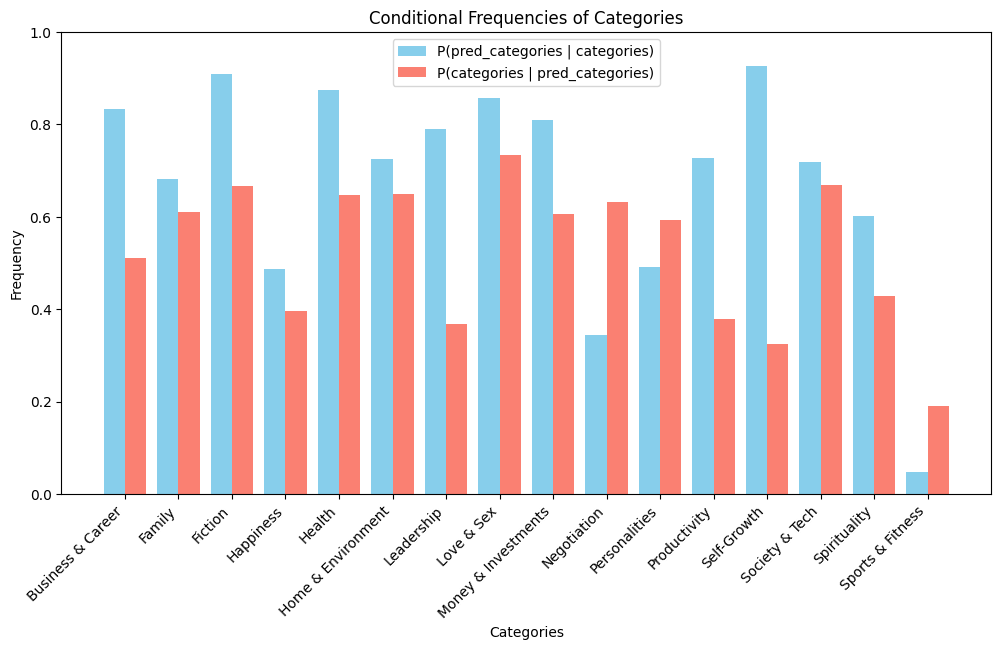

In [62]:
import matplotlib.pyplot as plt
import numpy as np


def compute_conditional_frequencies(df, col1, col2):
    """
    Computes the conditional probabilities P(col2 | col1) and P(col1 | col2).
    
    :param df: Pandas DataFrame
    :param col1: First column name containing lists of categories (manual or predicted)
    :param col2: Second column name containing lists of categories (predicted or manual)
    :return: Two dictionaries with conditional probabilities
    """
    # Count occurrences for conditional probabilities (initialization)
    count_col1 = {cat: 0 for sublist in df[col1] for cat in sublist}
    count_col2_given_col1 = {cat: 0 for sublist in df[col1] for cat in sublist}

    count_col2 = {cat: 0 for sublist in df[col2] for cat in sublist}
    count_col1_given_col2 = {cat: 0 for sublist in df[col2] for cat in sublist}

    # Compute co-occurrences
    for _, row in df.iterrows():
        manual_cats = set(row[col1])
        pred_cats = set(row[col2])
        
        for cat in manual_cats:
            count_col1[cat] += 1
            count_col2_given_col1[cat] += int(cat in pred_cats)  # Matching predictions
        
        for cat in pred_cats:
            count_col2[cat] += 1
            count_col1_given_col2[cat] += int(cat in manual_cats)  # Matching manual labels

    # Compute conditional probabilities
    prob_col2_given_col1 = {cat: count_col2_given_col1[cat] / count_col1[cat] for cat in count_col1 if count_col1[cat] > 0}
    prob_col1_given_col2 = {cat: count_col1_given_col2[cat] / count_col2[cat] for cat in count_col2 if count_col2[cat] > 0}

    return prob_col2_given_col1, prob_col1_given_col2


def plot_conditional_frequencies(df, col1, col2, title):
    """
    Plots conditional frequencies P(col2 | col1) and P(col1 | col2) as bar plots.
    """
    prob_col2_given_col1, prob_col1_given_col2 = compute_conditional_frequencies(df, col1, col2)

    # Sorting categories for consistent plotting
    all_categories = sorted(set(prob_col2_given_col1.keys()).union(set(prob_col1_given_col2.keys())))

    # Get values
    values_col2_given_col1 = [prob_col2_given_col1.get(cat, 0) for cat in all_categories]
    values_col1_given_col2 = [prob_col1_given_col2.get(cat, 0) for cat in all_categories]

    # Set up bar positions
    x = np.arange(len(all_categories))
    width = 0.4

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, values_col2_given_col1, width=width, label=f'P({col2} | {col1})', color='skyblue')
    plt.bar(x + width/2, values_col1_given_col2, width=width, label=f'P({col1} | {col2})', color='salmon')

    # Labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(ticks=x, labels=all_categories, rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


# Usage
plot_conditional_frequencies(df_books, 'categories', 'pred_categories', 'Conditional Frequencies of Categories')


 - Given summaries categorized as either Sports & Fitness, Negotiation, or Personalities (3) by human labelers, AI is more likely not to assign these categories than to do so. I.e., **AI doesn't think those summaries belong to these categories while humans do so.**.
 - Interestingly, there are quite a few categories for which humans are more likely not to assign them than to do so given that AI has labeled these categories as relevant: Sports & Fitness, Self-Growth, Leadership, Happiness, Productivity, Business & Career (6). I.e., **Humans don't think those summaries belong to these categories while AI does so**.

In [63]:
print("HUMAN SET SPORTS & FITNESS, BUT AI DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Sports & Fitness' in l) &
    df_books['pred_categories'].apply(lambda l: 'Sports & Fitness' not in l)].sample(5, random_state=42))

HUMAN SET SPORTS & FITNESS, BUT AI DIDN'T
Book (idx=1598)
 - Title: "The Beauty Myth: How Images of Beauty Are Used Against Women"
 - Author: Naomi Wolf
 - Overview: Challenge beauty norms that bind women. Embrace liberation from society's narrow gaze.
 - Author Overview: Naomi Wolf is a pioneering voice in contemporary feminism. Her fight is to advocate for a world where women's value isn't measured by their appearance but by their inherent strengths and achievements.
 - Categories: ['Health', 'Society & Tech', 'Sports & Fitness']
 - AI Categories: ['Society & Tech']
 - AI Reasoning Steps: ["The title 'The Beauty Myth' suggests a focus on societal standards of beauty, particularly how these standards affect women, indicating a strong connection to societal issues.", 'The author, Naomi Wolf, is known for her feminist perspectives and critiques of societal norms, which aligns with themes of gender and societal expectations.', "The overview emphasizes challenging beauty norms and liberat

Justified if AI was right not to include this category
 - 1596 — *JUSTIFIED*
 - 1015 — *JUSTIFIED*
 - 1307 — *JUSTIFIED*
 - 1341 — *JUSTIFIED*
 - 882 — *JUSTIFIED*

Conclusion
 - So far it seems that humans assigned books to Sports & Fitness randomly...

In [64]:
print("AI SET SPORTS & FITNESS, BUT HUMAN DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Sports & Fitness' not in l) &
    df_books['pred_categories'].apply(lambda l: 'Sports & Fitness' in l)].sample(5, random_state=42))

AI SET SPORTS & FITNESS, BUT HUMAN DIDN'T
Book (idx=566)
 - Title: "Spark: The Revolutionary New Science of Exercise and the Brain"
 - Author: John J. Ratey, MD
 - Overview: Get insights into the importance of exercising as a fundamental technique to take your life experience to the next level.
 - Author Overview: John J. Ratey, MD is an Associate Clinical Professor of Psychiatry at Harvard Medical School and an internationally recognized expert in Neuropsychiatry.
 - Categories: ['Self-Growth']
 - AI Categories: ['Health', 'Sports & Fitness']
 - AI Reasoning Steps: ["The title 'Spark: The Revolutionary New Science of Exercise and the Brain' suggests a focus on the relationship between physical exercise and cognitive function, indicating a strong connection to health and fitness.", 'The author, John J. Ratey, MD, is a medical doctor, which implies a scientific and health-oriented perspective on the subject matter, reinforcing the relevance of health as a primary category.', 'The overvi

JUSTIFIED — AI was right to include Sports & Fitness.

 - 2 — There definitely is a relation to Sports, GoodReads classifies it as Fitness, so *PROBABLY JUSTIFIED*
 - 90 — ***DEFINITELY** JUSTIFIED*
 - 828 — While Self-Growth might be a little too much, Sports & Fitness is a good fit. *JUSTIFIED*
 - 229 — Wow... Personalities? AI is right. *JUSTIFIED*
 - 1090 — *JUSTIFIED*

Conclusion:
 - Actually here rises a question: why Sports & Fitness category is so wrong? Given the examples above AI is so much better at assigning (or not) summaries to Sports & Fitness.

In [65]:
print("HUMAN SET NEGOTIATION, BUT AI DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Negotiation' in l) &
    df_books['pred_categories'].apply(lambda l: 'Negotiation' not in l)].sample(5, random_state=42))

HUMAN SET NEGOTIATION, BUT AI DIDN'T
Book (idx=10)
 - Title: "The First Minute: How to Start Conversations That Get Results"
 - Author: Chris Fenning
 - Overview: Are you ready to elevate your teamwork, leadership, and public speaking skills? Enhance your work processes and time management by becoming an expert at starting conversations.
 - Author Overview: Chris Fenning has over 20 years of experience helping organizations like NATO and Google communicate better. After being fed up with endless ads for communication courses that failed to deliver, he wrote his own guide.
 - Categories: ['Negotiation']
 - AI Categories: ['Leadership', 'Business & Career', 'Productivity']
 - AI Reasoning Steps: ["The book focuses on starting conversations effectively, which is a key skill in both leadership and teamwork. This suggests a strong connection to the categories of 'Leadership' and 'Business & Career'.", "The mention of enhancing public speaking skills indicates relevance to 'Leadership', as e

JUSTIFIED — AI was right not to include 'Negotiation'

 - 1412 — There is probably some relation to Negotiation, but at the same time, the book seems to be more about Society & Tech. Maybe the book itself relates topics of Negotiation and Personalities, but It's hard to say so just from the overview and learing items. *AMBIGUOUS*
 - 1604 — *NOT JUSTIFIED*
 - 10 — AI has actually assigned very relevant categories, but Negotiation *might* be applicable to. Actually, seems like we really need detailed descriptions of categories. *AMBIGUOUS*
 - 1103 — I see no mention of Negotiantion. *JUSTIFIED*
 - 109 — *PROBABLY NOT JUSTIFIED*

Conclusion:
 - It seems that this specific category is harder for AI to get right. Hypothesis: AI thinks negotiation is related to politics, sales, etc., and not to personal life. (see below)

In [66]:
print("AI SET NEGOTIATION")
show_books(df_books[
    df_books['pred_categories'].apply(lambda l: 'Negotiation' in l)].sample(5, random_state=5))

AI SET NEGOTIATION
Book (idx=1439)
 - Title: "Fair Play: A Game-Changing Solution for When You Have Too Much to Do"
 - Author: Eve Rodsky
 - Overview: Learn how you can win at parenting and life by engaging in the game of fair play. Discover the secrets to balancing your responsibilities as a caretaker and at work.
 - Author Overview: Eve Rodsky is an alumnus of the University of Michigan and Harvard Law School. She is also the founder of the Philanthropy Advisory Group.
 - Categories: ['Family', 'Negotiation']
 - AI Categories: ['Family', 'Productivity', 'Negotiation']
 - AI Reasoning Steps: ["The title 'Fair Play' suggests a focus on equity and balance, which aligns with themes of responsibility and partnership, particularly in family and work contexts.", 'The author, Eve Rodsky, is known for her work on balancing domestic responsibilities, which indicates a strong connection to family dynamics and productivity.', 'The overview emphasizes winning at parenting and balancing responsibi

 - Yes, seems that AI percieves "Negotiation" topic more like politics- or sales-related, or if there is a strong indication (e.g., explicit use of this word).

In [67]:
print("HUMAN SET PESRONALITIES, BUT AI DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Personalities' in l) &
    df_books['pred_categories'].apply(lambda l: 'Personalities' not in l)].sample(5, random_state=42))

HUMAN SET PESRONALITIES, BUT AI DIDN'T
Book (idx=848)
 - Title: "Is Everyone Hanging Out Without Me? (And Other Concerns)"
 - Author: Mindy Kaling
 - Overview: Discover how to embrace your individuality and achieve success on your terms through the lens of Mindy Kaling, an outstanding screenwriter.
 - Author Overview: Mindy Kaling is a talented writer, actress, and producer known for her work on hit TV shows like The Mindy Project and The Office. She is also a New York Times bestselling author.
 - Categories: ['Personalities', 'Self-Growth']
 - AI Categories: ['Self-Growth', 'Business & Career']
 - AI Reasoning Steps: ['The book is written by Mindy Kaling, who is known for her work in television and comedy, indicating a focus on personal experiences and insights rather than traditional self-help or business advice.', "The overview emphasizes embracing individuality and achieving success on one's own terms, which aligns closely with themes of self-growth and personal development.", "The

JUSTIFIED — AI was right not to set Personalities

 - 719 — *NOT JUSTIFIED*
 - 1293 — *NOT JUSTIFIED*
 - 1246 — *NOT JUSTIFIED*
 - 952 — *NOT JUSTIFIED*
 - 889 — *NOT JUSTIFIED*

Well, it seems that AI does pretty bad with this category. What books does it classify as "Personalities"?

In [68]:
show_books(df_books[df_books['pred_categories'].apply(lambda l: 'Personalities' in l)].sample(8, random_state=1))

Book (idx=1186)
 - Title: "The Lucifer Effect: Understanding How Good People Turn Evil"
 - Author: Philip G. Zimbardo
 - Overview: Is human nature good or evil? What exactly defines good and evil? Find the answers through the famous Stanford experiment, which shook the world by studying cruelty and heroism in extreme conditions.
 - Author Overview: Philip G. Zimbardo is a celebrated psychologist and Stanford professor renowned for the groundbreaking Stanford Prison Experiment. His work sheds light on the human capacity for both good and evil.
 - Categories: ['Society & Tech']
 - AI Categories: ['Society & Tech', 'Personalities']
 - AI Reasoning Steps: ["The book's title, 'The Lucifer Effect', suggests a focus on the nature of good and evil, which is a philosophical and psychological inquiry.", 'The author, Philip G. Zimbardo, is known for his work in psychology, particularly the Stanford prison experiment, which directly relates to the themes of morality, authority, and human behavior 

 - So AI might sometimes think that Personalities is about specific traits of people, types of their behaviour, etc. 
 - Shouldn't we distinguish biographies from "types of personalities"?

In [69]:
print("AI SET LEADERSHIP, BUT HUMAN DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Leadership' not in l) &
    df_books['pred_categories'].apply(lambda l: 'Leadership' in l)].sample(5, random_state=42))

AI SET LEADERSHIP, BUT HUMAN DIDN'T
Book (idx=914)
 - Title: "The Memo: What Women of Color Need to Know to Secure a Seat at the Table"
 - Author: Minda Harts
 - Overview: Need a boost in your professional journey? This empowering handbook provides women of color with essential keys to unlock career advancement.
 - Author Overview: Minda Harts is The Memo LLC's author, speaker, and CEO. Known for advancing workplace diversity and empowering women of color, she is also a professor at NYU, striving to enhance professional environments for underrepresented groups.
 - Categories: ['Business & Career', 'Society & Tech', 'Sports & Fitness']
 - AI Categories: ['Business & Career', 'Leadership', 'Self-Growth']
 - AI Reasoning Steps: ["The book is titled 'The Memo: What Women of Color Need to Know to Secure a Seat at the Table', which suggests a focus on professional development and empowerment for women of color.", 'The author, Minda Harts, likely has expertise or experience in career advancem

JUSTIFIED — AI was right to set leadership

 - 178 — One of the topic of the book — influencing other. The author is a leadership experts, so *JUSTIFIED*
 - 114 — *PROBABLY JUSTIFIED*
 - 1781 — *JUSTIFIED*
 - 807 — *PROBABLY JUSTIFIED*
 - 679 — *JUSTIFIED*

Conclusion
 - It seems that AI setting Leadership when human don't is mostly justified.


In [70]:
print("AI SET HAPPINESS, BUT HUMAN DIDN'T")
show_books(df_books[
    df_books['categories'].apply(lambda l: 'Happiness' not in l) &
    df_books['pred_categories'].apply(lambda l: 'Happiness' in l)].sample(5, random_state=0))

AI SET HAPPINESS, BUT HUMAN DIDN'T
Book (idx=523)
 - Title: "Inner Engineering: A Yogi's Guide to Joy"
 - Author: Sadhguru Jaggi Vasudev
 - Overview: Discover new perspectives on how you perceive yourself and the world. Find your inner balance to move through life with joy.
 - Author Overview: Sadhguru Jaggi Vasudev has been teaching yoga for over four decades. He founded the Isha Foundation — a volunteer organization focusing on education and spirituality.
 - Categories: ['Health', 'Spirituality']
 - AI Categories: ['Spirituality', 'Self-Growth', 'Happiness']
 - AI Reasoning Steps: ["The title 'Inner Engineering: A Yogi's Guide to Joy' suggests a focus on personal development and self-improvement, which aligns closely with the category of 'Self-Growth'.", "The author, Sadhguru Jaggi Vasudev, is known for his teachings on spirituality and inner well-being, indicating that 'Spirituality' is a primary category for this book.", "The overview emphasizes discovering new perspectives and fin

JUSTIFIED — AI was right to set Happiness category

 - 637 — just *JUSTIFIED*
 - 346 — *JUSTIFIED*
 - 758 — *PROBABLY JUSTIFIED*
 - 1334 — Considering everyting, it's *JUSTIFIED*
 - 787 — The book seems to be about everything, frankly. *AMBIGUOUS*

Conclusion
 - Overall, again, AI seems right setting Happiness category when humans don't.

Finally, as we've seen fiction is the least used category. Let's see the summaries that have been attributed to Fiction.

In [71]:
show_books(df_books[df_books['categories'].apply(lambda l: 'Fiction' in l) | df_books['pred_categories'].apply(lambda l: 'Fiction' in l)])

Book (idx=248)
 - Title: "The Last Wish: Introducing the Witcher"
 - Author: Andrzej Sapkowski
 - Overview: Dive into a world where magic, morality, and might entwine. By the end, unravel destiny's intricate knit.
 - Author Overview: Andrzej Sapkowski is a celebrated Polish fantasy writer. His storytelling has garnered international acclaim, including the World Fantasy Award for Lifetime Achievement, and enchanted readers worldwide.
 - Categories: ['Fiction']
 - AI Categories: ['Fiction']
 - AI Reasoning Steps: ["The title 'The Last Wish: Introducing the Witcher' suggests a fantasy genre, which typically falls under 'Fiction'.", 'The author, Andrzej Sapkowski, is known for his work in fantasy literature, particularly the Witcher series, which reinforces the idea that this book is primarily fictional.', "The overview mentions 'magic, morality, and might', which are common themes in fantasy literature, further supporting the categorization under 'Fiction'.", "The phrase 'unravel destiny'

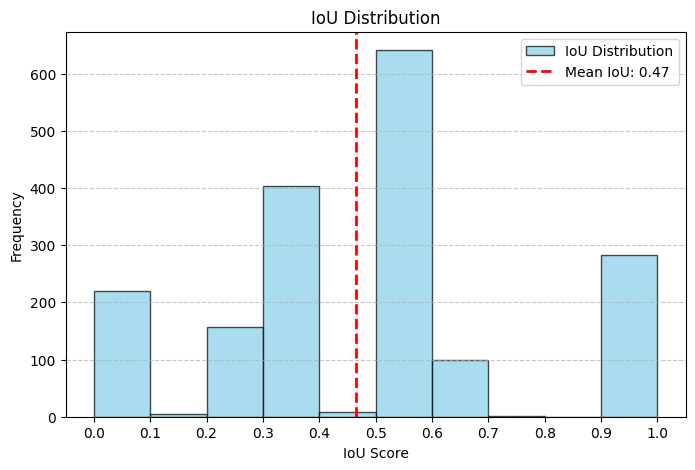

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def compute_iou(set1, set2):
    """Compute Intersection over Union (IoU) for two sets."""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

def plot_iou_distribution(df, col1, col2, title='IoU Distribution'):
    """
    Computes IoU for each row in df and plots the distribution with mean.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :param title: Title of the plot
    """
    # Compute IoUs for each row
    iou_scores = [
        compute_iou(set(row[col1]), set(row[col2])) 
        for _, row in df.iterrows()
    ]

    # Compute mean IoU
    mean_iou = np.mean(iou_scores)

    # Plot histogram
    plt.figure(figsize=(8, 5))
    plt.hist(iou_scores, color='skyblue', edgecolor='black', alpha=0.7, label='IoU Distribution')

    # Add vertical line for mean
    plt.axvline(mean_iou, color='red', linestyle='dashed', linewidth=2, label=f'Mean IoU: {mean_iou:.2f}')

    # Labels and formatting
    plt.xlabel('IoU Score')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(np.linspace(0, 1, 11))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Usage
plot_iou_distribution(df_books, 'categories', 'pred_categories')


In [73]:
import numpy as np
from collections import Counter

def compute_conditional_probabilities(df, col1, col2):
    """
    Computes P(col2 | col1) and P(col1 | col2) along with their micro and macro averages.
    
    :param df: Pandas DataFrame
    :param col1: First column (manual categories)
    :param col2: Second column (predicted categories)
    :return: Dictionary with computed micro & macro averages
    """
    # Count occurrences for conditional probabilities
    count_col1 = Counter(cat for sublist in df[col1] for cat in sublist)
    count_col2_given_col1 = Counter(cat for sublist, sublist_col1 in zip(df[col2], df[col1]) for cat in sublist if cat in sublist_col1)

    count_col2 = Counter(cat for sublist in df[col2] for cat in sublist)
    count_col1_given_col2 = Counter(cat for sublist, sublist_col2 in zip(df[col1], df[col2]) for cat in sublist if cat in sublist_col2)

    # Compute conditional probabilities
    prob_col2_given_col1 = {cat: count_col2_given_col1[cat] / count_col1[cat] for cat in count_col1 if count_col1[cat] > 0}
    prob_col1_given_col2 = {cat: count_col1_given_col2[cat] / count_col2[cat] for cat in count_col2 if count_col2[cat] > 0}

    # Compute macro (simple mean) and micro (weighted by occurrences) averages
    macro_avg_col2_given_col1 = np.mean(list(prob_col2_given_col1.values()))
    macro_avg_col1_given_col2 = np.mean(list(prob_col1_given_col2.values()))

    micro_avg_col2_given_col1 = sum(count_col1[cat] * prob_col2_given_col1.get(cat, 0) for cat in count_col1) / sum(count_col1.values())
    micro_avg_col1_given_col2 = sum(count_col2[cat] * prob_col1_given_col2.get(cat, 0) for cat in count_col2) / sum(count_col2.values())

    # Print results
    print(f"Micro-average P(AI | Manual): {micro_avg_col2_given_col1:.4f}")
    print(f"Macro-average P(AI | Manual): {macro_avg_col2_given_col1:.4f}")
    print(f"Micro-average P(Manual | AI): {micro_avg_col1_given_col2:.4f}")
    print(f"Macro-average P(Manual | AI): {macro_avg_col1_given_col2:.4f}")

# Usage
compute_conditional_probabilities(df_books, 'categories', 'pred_categories')


Micro-average P(AI | Manual): 0.6954
Macro-average P(AI | Manual): 0.6766
Micro-average P(Manual | AI): 0.4748
Macro-average P(Manual | AI): 0.5253


## More Examples

In [74]:
show_books(df_books.sample(15, random_state=42))

Book (idx=1506)
 - Title: "This Is Me Letting You Go"
 - Author: Heidi Priebe
 - Overview: Explore simple yet profound insights for moving on after heartbreak and embracing life with renewed strength. It is a must-read for anyone seeking emotional recovery and growth.
 - Author Overview: Heidi Priebe is a self-help author known for her relatable and insightful writing on relationships, self-love, and personal growth.
 - Categories: ['Self-Growth', 'Love & Sex']
 - AI Categories: ['Self-Growth']
 - AI Reasoning Steps: ["The title 'This Is Me Letting You Go' suggests themes of letting go and moving on, which aligns closely with emotional recovery and personal growth.", 'The author, Heidi Priebe, is known for writing about emotional and psychological topics, which further supports the idea that this book focuses on self-growth and healing after heartbreak.', "The overview emphasizes 'moving on after heartbreak' and 'embracing life with renewed strength', indicating a strong focus on perso